<table style="width:100%;"/>
    <tr>
        <td style="width:80%; text-align:left; vertical-align: center;"/>
            <img src="Figures/Logo_Combined.png" width="350" alt="logo" align="left"/>
        </td/>
        <td style="width:20%; text-align:left; vertical-align: top;"/>
            Biochemical Engineering Lab<br/>
            & Janssen Cilag AG<br/>
        </td/>
    </tr/>
</table/>

<center> 
    <h1>Master Thesis on Protein Aggregation: SEC Analysis </h1>
    <h3>by Eduard Meier</h3><br/>
</center>

In [1]:
# Import python libraries used in the following
import numpy as np                            # Import numerical python library
import pandas as pd                           # Import python data frame library
import matplotlib as mpl                      # Import python mathematical plotting library
import matplotlib.pyplot as plt               # Import python mathematical plotting library
from matplotlib.ticker import MaxNLocator
import os
import glob
import pathlib
from scipy.signal import savgol_filter

plt.rcParams['image.cmap']='jet'
#plt.rcParams['image.cmap']='magma'

# Use LaTeX font in plots
#plt.rcParams.update({
#'text.usetex': True,
#'font.family': 'serif',
#'font.size'  : 12,
#'font.serif': ['Computern Modern Roman'],
#})

"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 15,
'font.sans-serif': ['Arial'],
})
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial'
"""

plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 15,
'font.serif': ['Computern Modern Roman'],
})

print('Current working directory: ')
os.getcwd()

Current working directory: 


'/Users/eduardmeier/Desktop/MasterThesis_DataAnalysis/03_JupyterNotebooks'

# 1. Protein Aggregation

The values below are taken from the excel sheet ```Results_SEC.xlsx``` located under ```01_Data/03_SEC```, which is based on processed size exclusion chromatography (SEC) data as received from the report generated by Empower 3.

Since changes in the high molecular weight species (HMWS) and low molecular weight species (LMWS) were not significant between unsheared and sheared samples, based on the comparison of their respective peak areas, the following analysis only considers the monomer loss as calculated by the change in the main peak area (representative for the native population).

In [2]:
# Sample identifier
sampleID = ['Unsheared', 'Sheared, \n PMMA ', 'Sheared, \n Steel',
            'High Shear, \n PMMA', 'High Shear, \n Steel']
# Integrated main peak (area)
peakArea = [[26984967, 27097200], [27734549, 28760855], [27672873, 27698815], 
            [27668727, 27434852], [30994221, 28103285]]
peakAreaCorr = [[26984967, 27097200], [25926175, 26267391], [25838497, 25845291], 
                [25615213, 25476568], [25909505, 25686976]]

# Sample concentration [mg/mL] (as measured with SoloVPE)
sampleConc = [[12.20255, 12.4152], [13.16743, 13.47731], [13.18273, 13.19162],
                 [13.29565, 13.25501], [14.72448, 13.46674]]

# Monomer loss
monLossAvg = [0, -4.5, -2.4, -1.9, -9.3]
monLossStd = [0, 0.9, 0.3, 0.5, 0.6]

monLossCorrAvg = [0, 3.5, 4.4, 5.5, 4.6]
monLossCorrStd = [0, 0.9, 0.3, 0.5, 0.6]


# Perform averaging over duplicates
peakAreaAvg = []
peakAreaStd = []

for area in peakArea:
    peakAreaAvg.append(np.average(area))
    peakAreaStd.append(np.std(area))
    
peakAreaCorrAvg = []
peakAreaCorrStd = []
    
for area in peakAreaCorr:
    peakAreaCorrAvg.append(np.average(area))
    peakAreaCorrStd.append(np.std(area)) 

concAvg = []
concStd = []

for conc in sampleConc:
    concAvg.append(np.average(conc))
    concStd.append(np.std(conc))


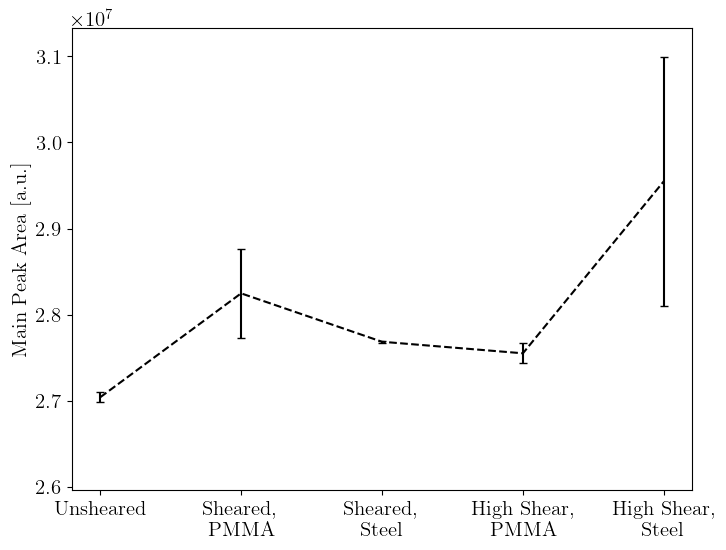

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

# 1. non-dimensional
plotArea = axs.errorbar(sampleID, peakAreaAvg, peakAreaStd, 
                        linestyle='dashed', marker='None', color='black', capsize=3)

#axs.set_title(r'Peak Area vs. Concentration')
#axs.set_xlabel(r'Sample ID')
axs.set_ylabel(r'Main Peak Area [a.u.]')
    
axs.set_ylim([0.96*np.min(peakAreaAvg), 1.06*np.max(peakAreaAvg)])

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'PeakArea_Uncorr.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'PeakArea_Uncorr.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

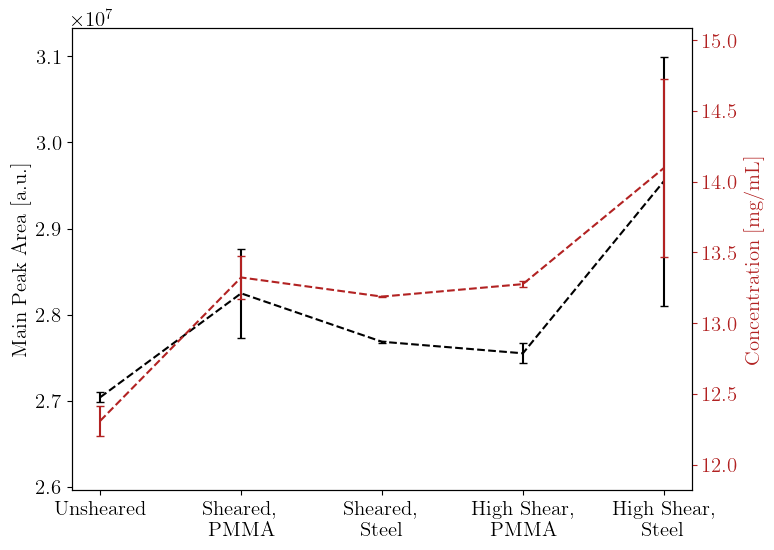

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

# 1. non-dimensional
plotArea = axs.errorbar(sampleID, peakAreaAvg, peakAreaStd, 
                        linestyle='dashed', marker='None', color='black', capsize=3)

ax2 = axs.twinx()

plotConc = ax2.errorbar(sampleID, concAvg, concStd, 
                        linestyle='dashed', marker='None', color='firebrick', capsize=3)
#axs.set_title(r'Peak Area vs. Concentration')
#axs.set_xlabel(r'Sample ID')
axs.set_ylabel(r'Main Peak Area [a.u.]')
ax2.set_ylabel(r'Concentration [mg/mL]')
    
axs.set_ylim([0.96*np.min(peakAreaAvg), 1.06*np.max(peakAreaAvg)])
ax2.set_ylim([0.96*np.min(concAvg), 1.07*np.max(concAvg)])

ax2.yaxis.label.set_color('firebrick')
ax2.tick_params(axis='y', colors='firebrick')

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'PeakAreaConc_Uncorr.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'PeakAreaConc_Uncorr.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

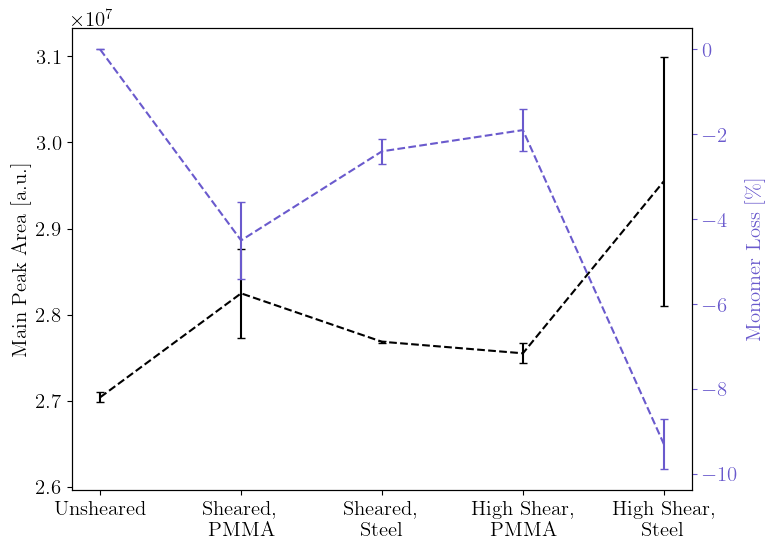

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

ax2 = axs.twinx()

# 1. non-dimensional
plotArea = axs.errorbar(sampleID, peakAreaAvg, peakAreaStd, linestyle='dashed', marker='None', color='black', capsize=3)
plotArea = ax2.errorbar(sampleID, monLossAvg, monLossStd, linestyle='dashed', marker='None', color='slateblue', capsize=3)

#axs.set_title(r'Corrected Peak Area and Monomer Loss')
#axs.set_xlabel(r'Sample ID')
axs.set_ylabel(r'Main Peak Area [a.u.]')
ax2.set_ylabel(r'Monomer Loss [\%]')

ax2.yaxis.label.set_color('slateblue')
ax2.tick_params(axis='y', colors='slateblue')

axs.set_ylim([0.96*np.min(peakAreaAvg), 1.06*np.max(peakAreaAvg)])

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'PeakAreaMonLoss_Uncorr.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'PeakAreaMonLoss_Uncorr.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

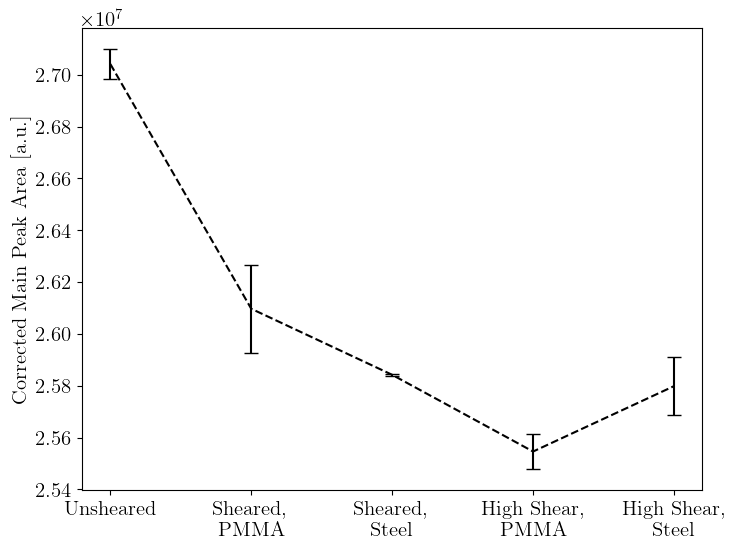

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

# 1. non-dimensional
plotArea = axs.errorbar(sampleID, peakAreaCorrAvg, peakAreaCorrStd, linestyle='dashed', marker='None', color='black', capsize=5)

#axs.set_title(r'Corrected Peak Area and Monomer Loss')
#axs.set_xlabel(r'Sample ID')
axs.set_ylabel(r'Corrected Main Peak Area [a.u.]')

ax2.yaxis.label.set_color('slateblue')

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'PeakArea_Corr.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'PeakArea_Corr.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

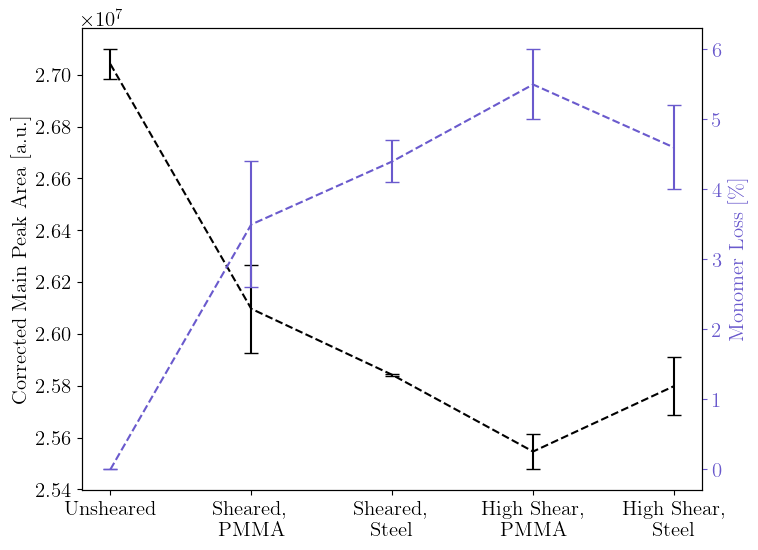

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

ax2 = axs.twinx()

# 1. non-dimensional
plotArea = axs.errorbar(sampleID, peakAreaCorrAvg, peakAreaCorrStd, linestyle='dashed', marker='None', color='black', capsize=5)
plotArea = ax2.errorbar(sampleID, monLossCorrAvg, monLossCorrStd, linestyle='dashed', marker='None', color='slateblue', capsize=5)

#axs.set_title(r'Corrected Peak Area and Monomer Loss')
#axs.set_xlabel(r'Sample ID')
axs.set_ylabel(r'Corrected Main Peak Area [a.u.]')
ax2.set_ylabel(r'Monomer Loss [\%]')

ax2.yaxis.label.set_color('slateblue')
ax2.tick_params(axis='y', colors='slateblue')

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'PeakAreaMonLoss_Corr.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'PeakAreaMonLoss_Corr.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

# 2. EV Aggregation

## 2.1 Data Extraction

In [8]:
def extractData(csvFiles):
    
    dataFrame = {}
    
    retData = {}
    intData = {}
    
    retData_downsampled = {}
    intData_downsampled = {}
    
    retData_smoothed = {}
    intData_smoothed = {}
    
    for csvFile in csvFiles:
        
        csvName = pathlib.PurePath(csvFile).name[:-4]#[:-15]
        
        # Read CSV-file
        dataFrame[csvName] = pd.read_csv(csvFile, sep='\t', header=0, encoding='utf-16', names=('Retention Time /min', 'Signal'))
        
        # Separate retention time and intensity data
        retDataFrame = dataFrame[csvName].iloc[:, 0]
        intDataFrame = dataFrame[csvName].iloc[:, 1]
        
        # Transform df into np array
        retData[csvName] = retDataFrame.values
        #intData[csvName] = intDataFrame.values - 1/2 * (intDataFrame.values[0] + intDataFrame.values[-1])
        intData[csvName] = intDataFrame.values - intDataFrame.values[0]
        
        # Define the downsample factor
        downsample_factor = 1

        # Reshape the array and compute the mean
        retData_downsampled[csvName] = retData[csvName].reshape(-1, downsample_factor).mean(axis=1)
        intData_downsampled[csvName] = intData[csvName].reshape(-1, downsample_factor).mean(axis=1)
        
        intData_smoothed[csvName] = savgol_filter(intData_downsampled[csvName], 301, 3)
        
    return retData_downsampled, intData_smoothed

In [9]:
csvFiles_intrinsic = sorted(glob.glob(os.path.join('..', '01_Data', '03_SEC', '01_Raw', '01_Intrinsic', '*.csv')))
csvFiles_labelled = sorted(glob.glob(os.path.join('..', '01_Data', '03_SEC', '01_Raw', '02_Labelled', '*.csv')))

retData_intrinsic, intData_intrinsic = extractData(csvFiles_intrinsic)
retData_labelled, intData_labelled = extractData(csvFiles_labelled)

## 2.2 Data Processing

In [10]:
def processData(retData, intData, fileNames):
    
    avgRetTime = {}
    avgInt = {}
    stdInt = {}

    
    if len(fileNames) == 3:
        
        avgRetTime = np.mean([retData[fileNames[0]], 
                              retData[fileNames[1]], 
                              retData[fileNames[2]]], 
                              axis=0)

        avgInt = np.mean([intData[fileNames[0]], 
                          intData[fileNames[1]], 
                          intData[fileNames[2]]], 
                          axis=0)

        stdInt = np.std([intData[fileNames[0]], 
                         intData[fileNames[1]], 
                         intData[fileNames[2]]], 
                         axis=0)  
        
    elif len(fileNames) == 2:
        
        avgRetTime = np.mean([retData[fileNames[0]], 
                              retData[fileNames[1]]], 
                              axis=0)

        avgInt = np.mean([intData[fileNames[0]], 
                          intData[fileNames[1]]], 
                          axis=0)

        stdInt = np.std([intData[fileNames[0]], 
                         intData[fileNames[1]]], 
                         axis=0)  
        
    else:
        
        print('Currently, the list "fileNames" must contain two or three elements!')
        
    return avgRetTime, avgInt, stdInt

In [11]:
avgRetTime = {}
avgInt = {}
stdInt = {}

avgRetTime['U'], avgInt['U'], stdInt['U'] = processData(retData_intrinsic, intData_intrinsic, 
                                                        ['EVs_3e10_000rpm_00-00min_NA_No1_230830',
                                                         'EVs_3e10_000rpm_00-00min_NA_No2_230830',
                                                         'EVs_3e10_000rpm_00-00min_NA_No3_230830'])

avgRetTime['S'], avgInt['S'], stdInt['S'] = processData(retData_intrinsic, intData_intrinsic, 
                                                        ['EVs_3e10_300rpm_20-00min_ST_No1_230830',
                                                         'EVs_3e10_300rpm_20-00min_ST_No2_230830',
                                                         'EVs_3e10_300rpm_20-00min_ST_No3_230830'])

avgRetTime['2S'], avgInt['2S'], stdInt['2S'] = processData(retData_intrinsic, intData_intrinsic, 
                                                        ['EVs_3e10_300rpm_40-00min_ST_No1_230830',
                                                         #'EVs_3e10_300rpm_40-00min_ST_No2_230830',
                                                        'EVs_3e10_300rpm_40-00min_ST_No3_230830'])

avgRetTime['U_l'], avgInt['U_l'], stdInt['U_l'] = processData(retData_labelled, intData_labelled, 
                                                        ['EVs_3e10_000rpm_00-00min_NA_No1_230830',
                                                         'EVs_3e10_000rpm_00-00min_NA_No2_230830',
                                                         'EVs_3e10_000rpm_00-00min_NA_No3_230830'])

avgRetTime['S_l'], avgInt['S_l'], stdInt['S_l'] = processData(retData_labelled, intData_labelled, 
                                                        ['EVs_3e10_300rpm_20-00min_ST_No1_230830',
                                                         'EVs_3e10_300rpm_20-00min_ST_No2_230830',
                                                         'EVs_3e10_300rpm_20-00min_ST_No3_230830'])

avgRetTime['2S_l'], avgInt['2S_l'], stdInt['2S_l'] = processData(retData_labelled, intData_labelled, 
                                                        ['EVs_3e10_300rpm_40-00min_ST_No1_230830',
                                                         'EVs_3e10_300rpm_40-00min_ST_No2_230830',
                                                         'EVs_3e10_300rpm_40-00min_ST_No3_230830'])

avgRetTime['C_l'], avgInt['C_l'], stdInt['C_l'] = processData(retData_labelled, intData_labelled, 
                                                        ['Control',
                                                         'Control_2',
                                                         'Control_3'])

avgRetTime['U_rbc'], avgInt['U_rbc'], stdInt['U_rbc'] = processData(retData_intrinsic, intData_intrinsic, 
                                                        [#'BVs_3e10_000rpm_00-00min_NA_No1_230906',
                                                         'BVs_3e10_000rpm_00-00min_NA_No2_230906',
                                                         'BVs_3e10_000rpm_00-00min_NA_No3_230906'])

avgRetTime['S_rbc'], avgInt['S_rbc'], stdInt['S_rbc'] = processData(retData_intrinsic, intData_intrinsic, 
                                                        ['BVs_3e10_300rpm_20-00min_ST_No1_230906',
                                                         'BVs_3e10_300rpm_20-00min_ST_No2_230906',
                                                         'BVs_3e10_300rpm_20-00min_ST_No3_230906'])

avgRetTime['2S_rbc'], avgInt['2S_rbc'], stdInt['2S_rbc'] = processData(retData_intrinsic, intData_intrinsic, 
                                                        ['BVs_3e10_300rpm_40-00min_ST_No1_230906',
                                                         'BVs_3e10_300rpm_40-00min_ST_No2_230906',
                                                         'BVs_3e10_300rpm_40-00min_ST_No3_230906'])

avgRetTime['U_PS20'], avgInt['U_PS20'], stdInt['U_PS20'] = processData(retData_intrinsic, intData_intrinsic, 
                                                        ['EVs_3e10_PS2_500ug_000rpm_00-00min_NA_No1_230918',
                                                         'EVs_3e10_PS2_500ug_000rpm_00-00min_NA_No2_230918',
                                                         'EVs_3e10_PS2_500ug_000rpm_00-00min_NA_No3_230918'])

avgRetTime['S_PS20'], avgInt['S_PS20'], stdInt['S_PS20'] = processData(retData_intrinsic, intData_intrinsic, 
                                                        ['EVs_3e10_PS2_500ug_300rpm_20-00min_ST_No1_230918',
                                                         'EVs_3e10_PS2_500ug_300rpm_20-00min_ST_No2_230918',
                                                         'EVs_3e10_PS2_500ug_300rpm_20-00min_ST_No3_230918'])

avgRetTime['2S_PS20'], avgInt['2S_PS20'], stdInt['2S_PS20'] = processData(retData_intrinsic, intData_intrinsic, 
                                                        ['EVs_3e10_PS2_500ug_300rpm_40-00min_ST_No1_230918',
                                                         'EVs_3e10_PS2_500ug_300rpm_40-00min_ST_No2_230918',
                                                         'EVs_3e10_PS2_500ug_300rpm_40-00min_ST_No3_230918'])

avgRetTime['PS20'], avgInt['PS20'], stdInt['PS20'] = processData(retData_intrinsic, intData_intrinsic, 
                                                        ['PBS_00mg_PS2_500ug_000rpm_00-00min_NA_No1_230919',
                                                         'PBS_00mg_PS2_500ug_000rpm_00-00min_NA_No2_230919',
                                                         'PBS_00mg_PS2_500ug_000rpm_00-00min_NA_No3_230919'])

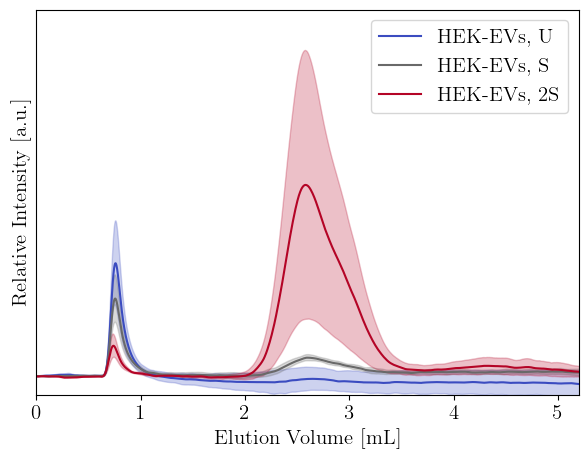

In [12]:
"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 15,
'font.sans-serif': ['Arial'],
})
"""

plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 15,
'font.serif': ['Computern Modern Roman'],
})

elutionRate = 0.1        # Elution rate [mL/min]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,3)))


fig, ax = plt.subplots(figsize=(7,5))

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][0] 

ax.plot(avgRetTime['U']*0.1, avgInt['U'], color=col)
ax.fill_between(avgRetTime['U']*0.1, avgInt['U']-stdInt['U'], 
                avgInt['U']+stdInt['U'],
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][1] 
offset = 0

ax.plot(avgRetTime['S']*0.1, avgInt['S']+offset, color='dimgray')
ax.fill_between(avgRetTime['S']*0.1, avgInt['S']-stdInt['S']+offset, 
                avgInt['S']+stdInt['S']+offset,
                color='dimgray', alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][2] 
offset = 0

ax.plot(avgRetTime['2S']*0.1, avgInt['2S']+offset, color=col)
ax.fill_between(avgRetTime['2S']*0.1, avgInt['2S']-stdInt['2S']+offset, 
                avgInt['2S']+stdInt['2S']+offset,
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)


ax.legend(['HEK-EVs, U', 'HEK-EVs, S', 'HEK-EVs, 2S'], loc='upper right')

ax.set_xlabel(r'Elution Volume [mL]')
ax.set_ylabel(r'Relative Intensity [a.u.]')

ax.tick_params(
axis='y',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
left=False,        # ticks along the left edge are off
labelleft=False)   # labels along the left edge are off

ax.set_xlim([0, 5.2])
ax.set_ylim([-3, 60])

#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'HEK-EVs_SEC_FLD.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'HEK-EVs_SEC_FLD.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

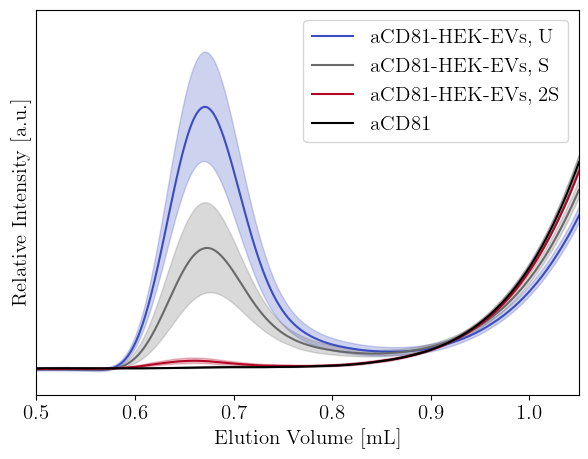

In [13]:
elutionRate = 0.1        # Elution rate [mL/min]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,3)))


fig, ax = plt.subplots(figsize=(7,5))

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][0] 

ax.plot(avgRetTime['U_l']*0.1, avgInt['U_l'], color=col)
ax.fill_between(avgRetTime['U_l']*0.1, avgInt['U_l']-stdInt['U_l'], 
                avgInt['U_l']+stdInt['U_l'],
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][1] 
offset = 0

ax.plot(avgRetTime['S_l']*0.1, avgInt['S_l']+offset, color='dimgray')
ax.fill_between(avgRetTime['S_l']*0.1, avgInt['S_l']-stdInt['S_l']+offset, 
                avgInt['S_l']+stdInt['S_l']+offset,
                color='dimgray', alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][2] 
offset = 0

ax.plot(avgRetTime['2S_l']*0.1, avgInt['2S_l']+offset, color=col)
ax.fill_between(avgRetTime['2S_l']*0.1, avgInt['2S_l']-stdInt['2S_l']+offset, 
                avgInt['2S_l']+stdInt['2S_l']+offset,
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)
offset = 0

ax.plot(avgRetTime['C_l']*0.1, avgInt['C_l']+offset, color='black')
ax.fill_between(avgRetTime['C_l']*0.1, avgInt['C_l']-stdInt['C_l']+offset, 
                avgInt['C_l']+stdInt['C_l']+offset,
                color='black', alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

ax.legend(['aCD81-HEK-EVs, U', 'aCD81-HEK-EVs, S', 'aCD81-HEK-EVs, 2S', 'aCD81'], loc='upper right')

ax.set_xlabel(r'Elution Volume [mL]')
ax.set_ylabel(r'Relative Intensity [a.u.]')

ax.tick_params(
axis='y',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
left=False,        # ticks along the left edge are off
labelleft=False)   # labels along the left edge are off

ax.set_xlim([0.5, 1.05])
ax.set_ylim([-0.5, 7])

#ax.xaxis.set_major_locator(MaxNLocator(integer=True))

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'HEK-EVs_SEC_FLD_Labelled.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'HEK-EVs_SEC_FLD_Labelled.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

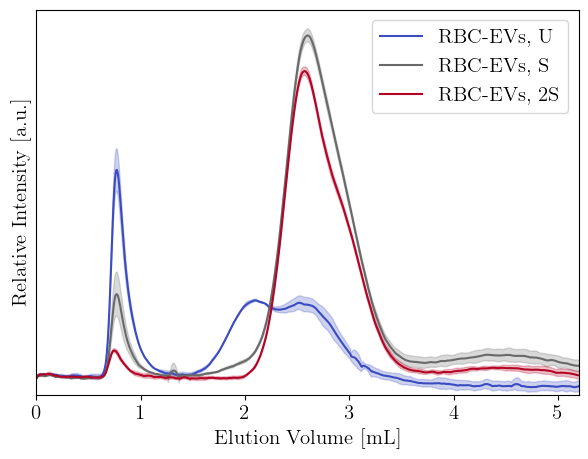

In [14]:
"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 15,
'font.sans-serif': ['Arial'],
})
"""

plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 15,
'font.serif': ['Computern Modern Roman'],
})

elutionRate = 0.1        # Elution rate [mL/min]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,3)))


fig, ax = plt.subplots(figsize=(7,5))

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][0] 

ax.plot(avgRetTime['U_rbc']*0.1, avgInt['U_rbc'], color=col)
ax.fill_between(avgRetTime['U_rbc']*0.1, avgInt['U_rbc']-stdInt['U_rbc'], 
                avgInt['U_rbc']+stdInt['U_rbc'],
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][1] 
offset = 0

ax.plot(avgRetTime['S_rbc']*0.1, avgInt['S_rbc']+offset, color='dimgray')
ax.fill_between(avgRetTime['S_rbc']*0.1, avgInt['S_rbc']-stdInt['S_rbc']+offset, 
                avgInt['S_rbc']+stdInt['S_rbc']+offset,
                color='dimgray', alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][2] 
offset = 0

ax.plot(avgRetTime['2S_rbc']*0.1, avgInt['2S_rbc']+offset, color=col)
ax.fill_between(avgRetTime['2S_rbc']*0.1, avgInt['2S_rbc']-stdInt['2S_rbc']+offset, 
                avgInt['2S_rbc']+stdInt['2S_rbc']+offset,
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)


ax.legend(['RBC-EVs, U', 'RBC-EVs, S', 'RBC-EVs, 2S'], loc='upper right')

ax.set_xlabel(r'Elution Volume [mL]')
ax.set_ylabel(r'Relative Intensity [a.u.]')

ax.tick_params(
axis='y',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
left=False,        # ticks along the left edge are off
labelleft=False)   # labels along the left edge are off

ax.set_xlim([0, 5.2])
ax.set_ylim([-0.5, 10])

#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'RBC-EVs_SEC_FLD.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'RBC-EVs_SEC_FLD.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

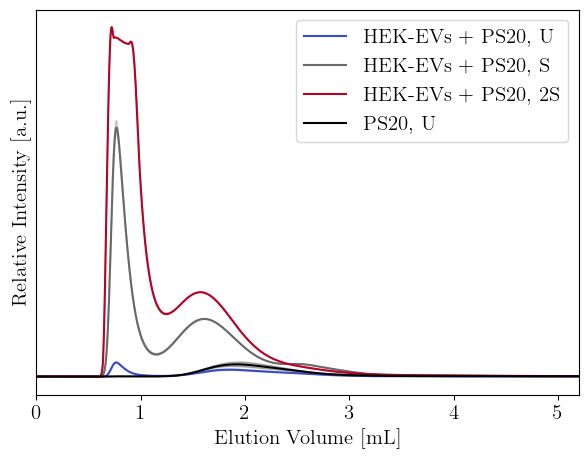

In [15]:
"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 15,
'font.sans-serif': ['Arial'],
})
"""

plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 15,
'font.serif': ['Computern Modern Roman'],
})

elutionRate = 0.1        # Elution rate [mL/min]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,3)))


fig, ax = plt.subplots(figsize=(7,5))

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][0] 

ax.plot(avgRetTime['U_PS20']*0.1, avgInt['U_PS20'], color=col)
ax.fill_between(avgRetTime['U_PS20']*0.1, avgInt['U_PS20']-stdInt['U_PS20'], 
                avgInt['U_PS20']+stdInt['U_PS20'],
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][1] 
offset = 0

ax.plot(avgRetTime['S_PS20']*0.1, avgInt['S_PS20']+offset, color='dimgray')
ax.fill_between(avgRetTime['S_PS20']*0.1, avgInt['S_PS20']-stdInt['S_PS20']+offset, 
                avgInt['S_PS20']+stdInt['S_PS20']+offset,
                color='dimgray', alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][2] 
offset = 0

ax.plot(avgRetTime['2S_PS20']*0.1, avgInt['2S_PS20']+offset, color=col)
ax.fill_between(avgRetTime['2S_PS20']*0.1, avgInt['2S_PS20']-stdInt['2S_rbc']+offset, 
                avgInt['2S_PS20']+stdInt['2S_PS20']+offset,
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = 'black'
offset = 0

ax.plot(avgRetTime['PS20']*0.1, avgInt['PS20']+offset, color=col)
ax.fill_between(avgRetTime['PS20']*0.1, avgInt['PS20']-stdInt['PS20']+offset, 
                avgInt['PS20']+stdInt['PS20']+offset,
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)


ax.legend(['HEK-EVs + PS20, U', 'HEK-EVs + PS20, S', 'HEK-EVs + PS20, 2S', 'PS20, U'], loc='upper right')

ax.set_xlabel(r'Elution Volume [mL]')
ax.set_ylabel(r'Relative Intensity [a.u.]')

ax.tick_params(
axis='y',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
left=False,        # ticks along the left edge are off
labelleft=False)   # labels along the left edge are off

ax.set_xlim([0, 5.2])
#ax.set_ylim([-0.5, 10])

#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'HEK-EVs_PS20_SEC_FLD.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'HEK-EVs_PS20_SEC_FLD.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

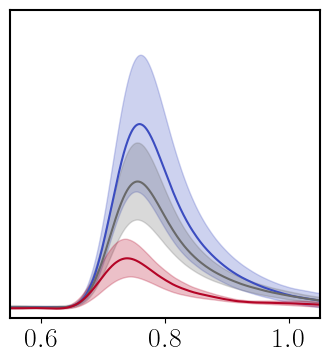

In [16]:
"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 20,
'font.sans-serif': ['Arial'],
})
"""

plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 20,
'font.serif': ['Computern Modern Roman'],
})

elutionRate = 0.1        # Elution rate [mL/min]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,3)))


fig, ax = plt.subplots(figsize=(4,4))

ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][0] 

ax.plot(avgRetTime['U']*0.1, avgInt['U'], color=col)
ax.fill_between(avgRetTime['U']*0.1, avgInt['U']-stdInt['U'], 
                avgInt['U']+stdInt['U'],
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][1] 
offset = 0

ax.plot(avgRetTime['S']*0.1, avgInt['S']+offset, color='dimgray')
ax.fill_between(avgRetTime['S']*0.1, avgInt['S']-stdInt['S']+offset, 
                avgInt['S']+stdInt['S']+offset,
                color='dimgray', alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][2] 
offset = 0

ax.plot(avgRetTime['2S']*0.1, avgInt['2S']+offset, color=col)
ax.fill_between(avgRetTime['2S']*0.1, avgInt['2S']-stdInt['2S']+offset, 
                avgInt['2S']+stdInt['2S']+offset,
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)


#ax.legend(['EVs, Unsheared', 'EVs, Sheared', 'EVs, 2x Sheared'], loc='upper left')

#ax.set_xlabel(r'Elution Volume [mL]')
#ax.set_ylabel(r'Relative Intensity [a.u.]')

ax.tick_params(
axis='y',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
left=False,        # ticks along the left edge are off
labelleft=False)   # labels along the left edge are off

ax.set_xlim([0.55, 1.05])
ax.set_ylim([-1, 30])

#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'EVs_SEC_FLD_Zoom.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'EVs_SEC_FLD_Zoom.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

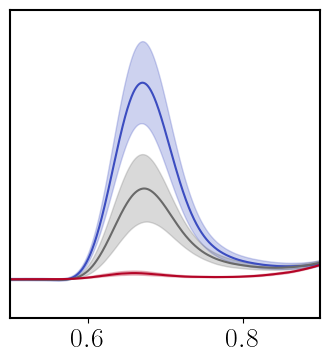

In [17]:
"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 20,
'font.sans-serif': ['Arial'],
})
"""

plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 20,
'font.serif': ['Computern Modern Roman'],
})

elutionRate = 0.1        # Elution rate [mL/min]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,3)))


fig, ax = plt.subplots(figsize=(4,4))

ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][0] 

ax.plot(avgRetTime['U_l']*0.1, avgInt['U_l'], color=col)
ax.fill_between(avgRetTime['U_l']*0.1, avgInt['U_l']-stdInt['U_l'], 
                avgInt['U_l']+stdInt['U_l'],
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][1] 
offset = 0

ax.plot(avgRetTime['S_l']*0.1, avgInt['S_l']+offset, color='dimgray')
ax.fill_between(avgRetTime['S_l']*0.1, avgInt['S_l']-stdInt['S_l']+offset, 
                avgInt['S_l']+stdInt['S_l']+offset,
                color='dimgray', alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][2] 
offset = 0

ax.plot(avgRetTime['2S_l']*0.1, avgInt['2S_l']+offset, color=col)
ax.fill_between(avgRetTime['2S_l']*0.1, avgInt['2S_l']-stdInt['2S_l']+offset, 
                avgInt['2S_l']+stdInt['2S_l']+offset,
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)


#ax.legend(['EVs, Unsheared', 'EVs, Sheared', 'EVs, 2x Sheared'], loc='upper left')

#ax.set_xlabel(r'Elution Volume [mL]')
#ax.set_ylabel(r'Relative Intensity [a.u.]')

ax.tick_params(
axis='y',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
left=False,        # ticks along the left edge are off
labelleft=False)   # labels along the left edge are off

ax.set_xlim([0.5, 0.9])
ax.set_ylim([-1, 7])

#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'EVs_SEC_FLD_Labelled_Zoom.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'EVs_SEC_FLD_Labelled_Zoom.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

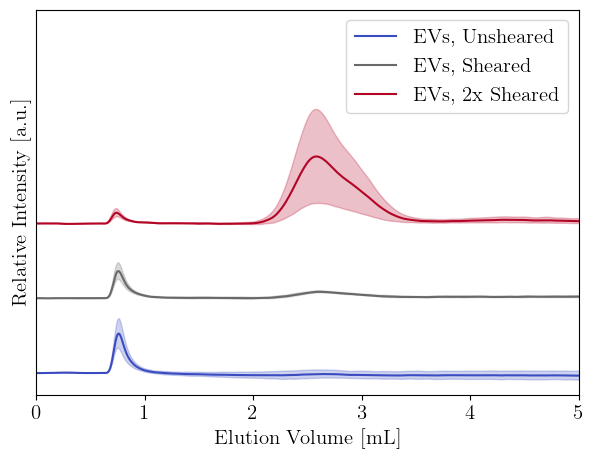

In [18]:
"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 15,
'font.sans-serif': ['Arial'],
})
"""

plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 15,
'font.serif': ['Computern Modern Roman'],
})

elutionRate = 0.1        # Elution rate [mL/min]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,3)))


fig, ax = plt.subplots(figsize=(7,5))

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][0] 

ax.plot(avgRetTime['U']*0.1, avgInt['U'], color=col)
ax.fill_between(avgRetTime['U']*0.1, avgInt['U']-stdInt['U'], 
                avgInt['U']+stdInt['U'],
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][1] 
offset = 35

ax.plot(avgRetTime['S']*0.1, avgInt['S']+offset, color='dimgray')
ax.fill_between(avgRetTime['S']*0.1, avgInt['S']-stdInt['S']+offset, 
                avgInt['S']+stdInt['S']+offset,
                color='dimgray', alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][2] 
offset = 70

ax.plot(avgRetTime['2S']*0.1, avgInt['2S']+offset, color=col)
ax.fill_between(avgRetTime['2S']*0.1, avgInt['2S']-stdInt['2S']+offset, 
                avgInt['2S']+stdInt['2S']+offset,
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)


ax.legend(['EVs, Unsheared', 'EVs, Sheared', 'EVs, 2x Sheared'], loc='upper right')

ax.set_xlabel(r'Elution Volume [mL]')
ax.set_ylabel(r'Relative Intensity [a.u.]')

ax.tick_params(
axis='y',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
left=False,        # ticks along the left edge are off
labelleft=False)   # labels along the left edge are off

ax.set_xlim([0, 5])
ax.set_ylim([-10, 170])

#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'EVs_SEC_FLD.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'EVs_SEC_FLD.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

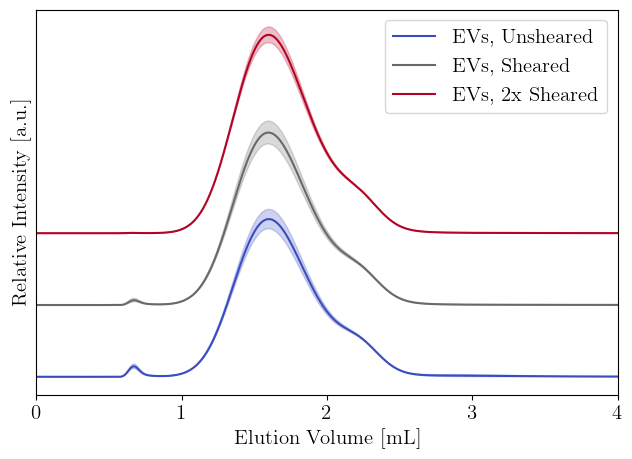

In [19]:
elutionRate = 0.1        # Elution rate [mL/min]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,3)))


fig, ax = plt.subplots(figsize=(7.5,5))

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][0] 

ax.plot(avgRetTime['U_l']*0.1, avgInt['U_l'], color=col)
ax.fill_between(avgRetTime['U_l']*0.1, avgInt['U_l']-stdInt['U_l'], 
                avgInt['U_l']+stdInt['U_l'],
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][1] 
offset = 35

ax.plot(avgRetTime['S_l']*0.1, avgInt['S_l']+offset, color='dimgray')
ax.fill_between(avgRetTime['S_l']*0.1, avgInt['S_l']-stdInt['S_l']+offset, 
                avgInt['S_l']+stdInt['S_l']+offset,
                color='dimgray', alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)

col = plt.rcParams['axes.prop_cycle'].by_key()['color'][2] 
offset = 70

ax.plot(avgRetTime['2S_l']*0.1, avgInt['2S_l']+offset, color=col)
ax.fill_between(avgRetTime['2S_l']*0.1, avgInt['2S_l']-stdInt['2S_l']+offset, 
                avgInt['2S_l']+stdInt['2S_l']+offset,
                color=col, alpha=0.25, linewidth=1, linestyle='solid', label='_nolegend_', 
                antialiased=True)


ax.legend(['EVs, Unsheared', 'EVs, Sheared', 'EVs, 2x Sheared'], loc='upper right')

ax.set_xlabel(r'Elution Volume [mL]')
ax.set_ylabel(r'Relative Intensity [a.u.]')

ax.tick_params(
axis='y',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
left=False,        # ticks along the left edge are off
labelleft=False)   # labels along the left edge are off

ax.set_xlim([0, 4])
#ax.set_ylim([-200, 100])

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

fileNamePdf = os.path.join('..', '02_Plots', '03_SEC', '01_PDF', 'EVs_SEC_FLD_Labelled.pdf')
fileNamePng = os.path.join('..', '02_Plots', '03_SEC', '02_PNG', 'EVs_SEC_FLD_Labelled.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()